In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [16]:
df = pd.read_csv ('height-weight.csv')

In [17]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [18]:
df.shape

(8555, 3)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [20]:
df.isnull ().sum()

Gender    0
Height    0
Weight    0
dtype: int64

C:\Users\SOLAYMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


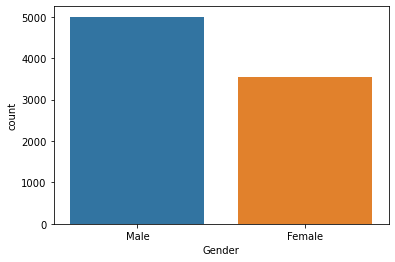

In [21]:
sn.countplot(df['Gender'])

C:\Users\SOLAYMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SOLAYMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


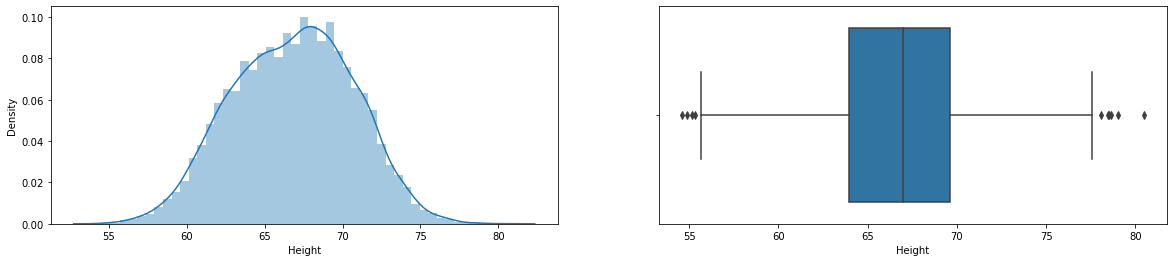

In [22]:
dist_plot = plt.figure(figsize=(20,4))
dist_plot.add_subplot(1,2,1)
sn.distplot(df['Height'])
dist_plot.add_subplot(1,2,2)
sn.boxplot(df['Height'])

C:\Users\SOLAYMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SOLAYMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


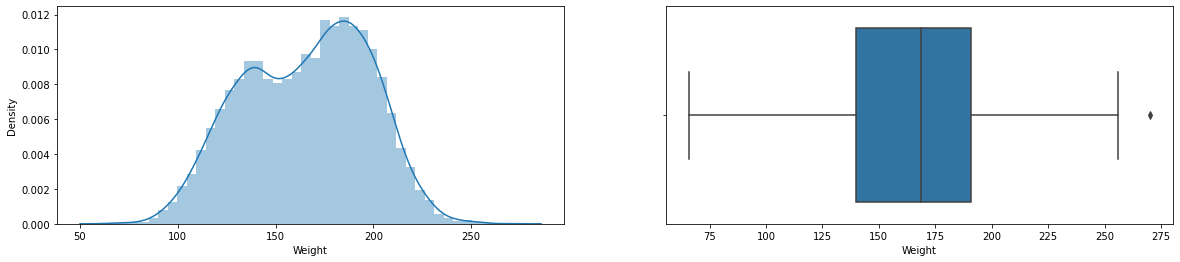

In [23]:
dist_plot = plt.figure(figsize=(20,4))
dist_plot.add_subplot(1,2,1)
sn.distplot(df['Weight'])
dist_plot.add_subplot(1,2,2)
sn.boxplot(df['Weight'])

# Apply Linear Regression

In [24]:
from sklearn.preprocessing import LabelEncoder

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [25]:
label = LabelEncoder()

In [26]:
df.Gender = label.fit_transform(df['Gender'])

In [27]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [28]:
x = df.drop('Weight', axis=1)
y= df['Weight']

In [29]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [30]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split as tts

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [32]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.3, random_state=42)

In [33]:
xtrain.head()

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


In [34]:
ytrain.head()

553     186.751417
1397    211.031652
7934    143.768451
8367    151.814648
3320    196.505814
Name: Weight, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [36]:
reg=LinearRegression()

In [37]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [38]:
pred = reg.predict(xtest)

In [39]:
pred

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [40]:
ytest.head()

6006    149.668369
1197    197.642244
2862    178.551191
6497    141.343095
2860    195.322675
Name: Weight, dtype: float64

In [41]:
reg.coef_

array([19.54151693,  5.9562333 ])

In [42]:
reg.intercept_

-243.79306041624181

In [43]:
reg.score(xtest, ytest)

0.905911242442266

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [45]:
MAE = mean_absolute_error (ytest, pred)
MSE = mean_squared_error (ytest, pred)
Accuracy = r2_score (ytest, pred)

In [46]:
print ("MAE:", MAE)
print ("MSE:", MSE)
print ("Accuracy:", Accuracy)

MAE: 7.870097130738319
MSE: 96.83734437830606
Accuracy: 0.905911242442266


# Appy KNN Regressor_Default

In [47]:
from sklearn.neighbors import KNeighborsRegressor

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [48]:
neigh = KNeighborsRegressor(n_neighbors=5)

In [49]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [50]:
KNN_reg_predict = neigh.predict(xtest)

In [51]:
KNN_reg_predict

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

In [52]:
ytest.head()

6006    149.668369
1197    197.642244
2862    178.551191
6497    141.343095
2860    195.322675
Name: Weight, dtype: float64

In [81]:
only_knn= neigh.score(xtest, ytest)

In [82]:
only_knn

0.8821086423439015

# Using Randomized search CV

In [68]:
n_neighbors = list(range(1,20))
leaf_size = list(range(1,50))
p=[1,2]

In [69]:
hyperparameters = dict (n_neighbors = n_neighbors, leaf_size = leaf_size, p=p)

In [70]:
print (hyperparameters)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'p': [1, 2]}


In [71]:
neigh_2 = KNeighborsRegressor()

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
rsc = RandomizedSearchCV(neigh_2 , hyperparameters, cv=5)

In [75]:
model = rsc.fit(xtrain, ytrain)

In [76]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best leaf_size:', model.best_estimator_.get_params()['leaf_size'])
print('Best p:', model.best_estimator_.get_params()['p'])

Best n_neighbors: 18
Best leaf_size: 4
Best p: 2


In [77]:
model.predict (xtest)

array([144.96456566, 182.95516102, 193.92487429, ..., 101.05365448,
       193.37363271, 143.83419002])

In [78]:
ytest.head()

6006    149.668369
1197    197.642244
2862    178.551191
6497    141.343095
2860    195.322675
Name: Weight, dtype: float64

In [84]:
knn_rsc = model.score(xtest,ytest)

In [85]:
knn_rsc

0.9000167595478338

<BarContainer object of 2 artists>

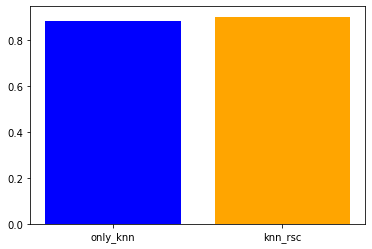

In [98]:
x=['only_knn', 'knn_rsc']
y= [only_knn, knn_rsc]
c = ['blue', 'orange']
plt.bar (x,y, color= c)

# KNN Classifier_default

In [99]:
df1 = pd.read_csv('height-weight.csv')

In [100]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [105]:
x1 = df1.drop('Gender', axis=1)
y1 = df1.Gender

In [106]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [107]:
y1.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [108]:
xtrain, xtest, ytrain, ytest = tts(x1, y1, test_size=0.3, random_state=42)

In [109]:
xtrain.head()

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814


In [110]:
ytrain.head()

553       Male
1397      Male
7934    Female
8367    Female
3320      Male
Name: Gender, dtype: object

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier()

In [114]:
knn_cl.fit(xtrain, ytrain)

KNeighborsClassifier()

In [116]:
pred = knn_cl.predict(xtest)

In [117]:
pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [118]:
ytest.head()

6006    Female
1197      Male
2862      Male
6497    Female
2860      Male
Name: Gender, dtype: object

In [125]:
from sklearn.metrics import classification_report

In [126]:
report=classification_report(ytest, pred)

In [127]:
print (report)

              precision    recall  f1-score   support

      Female       0.90      0.89      0.89      1066
        Male       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [128]:
knn_cl.score(xtest,ytest)

0.9131281651733542